In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [2]:
# Reading .parquet File
df=pd.read_parquet(r'C:\Users\91706\Data Analytics Practice\databases\python\veh crash\Motor_Vehicle_Collisions_Crashes.parquet')

#Formatting to date format and extracting year & month
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
df['crash_year']=df['CRASH DATE'].dt.year
df['month'] = df['CRASH DATE'].dt.strftime('%b')
df['date'] = df['CRASH DATE'].dt.day
df['day']=df['CRASH DATE'].dt.strftime('%a')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218398 entries, 0 to 2218397
Data columns (total 33 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   CRASH DATE                     datetime64[ns]
 1   CRASH TIME                     object        
 2   BOROUGH                        object        
 3   ZIP CODE                       object        
 4   LATITUDE                       float64       
 5   LONGITUDE                      float64       
 6   LOCATION                       object        
 7   ON STREET NAME                 object        
 8   CROSS STREET NAME              object        
 9   OFF STREET NAME                object        
 10  NUMBER OF PERSONS INJURED      float64       
 11  NUMBER OF PERSONS KILLED       float64       
 12  NUMBER OF PEDESTRIANS INJURED  int64         
 13  NUMBER OF PEDESTRIANS KILLED   int64         
 14  NUMBER OF CYCLIST INJURED      int64         
 15  NUMBER OF CYCLI

- How many people were injured or killed in total?

In [3]:
pd.set_option('display.max_columns', None)
df.head(2)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,crash_year,month,date,day
0,2021-09-11,2:39,None,None,NaN,NaN,None,WHITESTONE EXPRESSWAY,20 AVENUE,None,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,None,None,None,4455765,Sedan,Sedan,None,None,None,2021,Sep,11,Sat
1,2022-03-26,11:45,None,None,NaN,NaN,None,QUEENSBORO BRIDGE UPPER,None,None,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,None,None,None,None,4513547,Sedan,None,None,None,None,2022,Mar,26,Sat


In [4]:
plot6=df[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED']].sum().reset_index(name='count')
plot6

,index,count
0,NUMBER OF PERSONS INJURED,727699.0
1,NUMBER OF PERSONS KILLED,3517.0


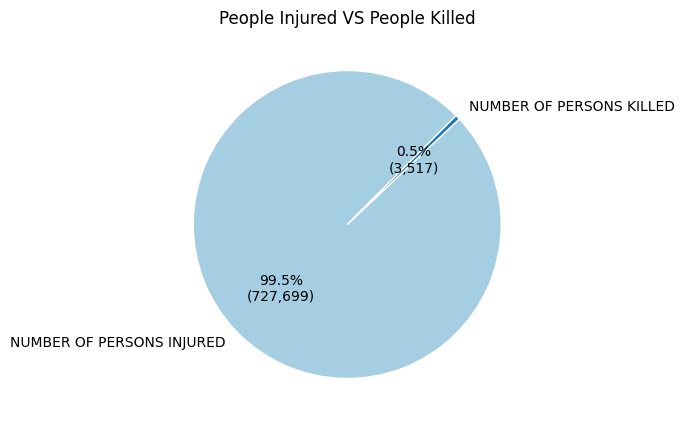

In [5]:
plt.figure(figsize=(8,5))

def autopct_format(values):
    def inner_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count:,})'  
    return inner_autopct

plt.pie(plot6['count'],
        labels=plot6['index'],
        autopct=autopct_format(plot6['count']),
        startangle=45,
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})

plt.title('People Injured VS People Killed')
plt.show()

- What’s the average number of people injured per crash?

In [6]:
plot7=df.groupby('crash_year')['NUMBER OF PERSONS INJURED'].mean().reset_index(name='count')
plot7

,crash_year,count
0,2012,0.273042
1,2013,0.270577
2,2014,0.248634
3,2015,0.235950
4,2016,0.262442
5,2017,0.262585
6,2018,0.267491
7,2019,0.290279
8,2020,0.395104
9,2021,0.468396


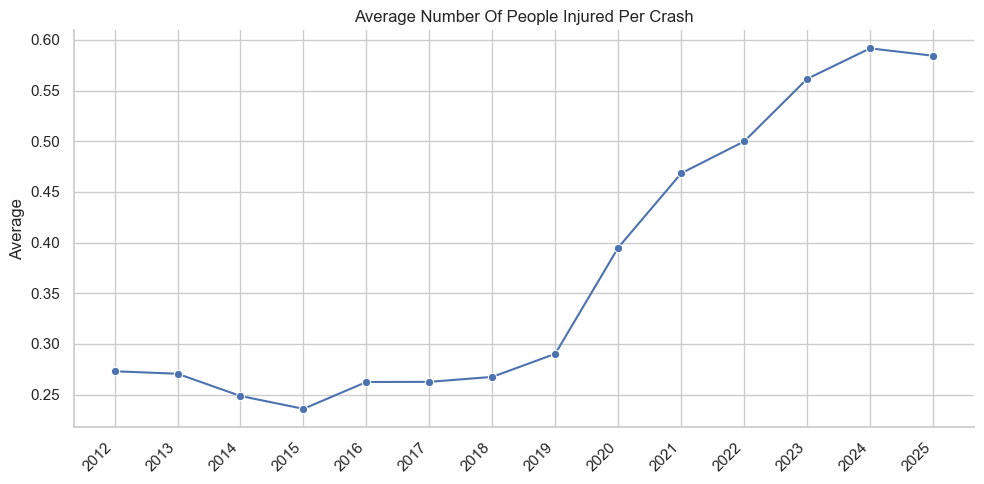

In [7]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,5))
ax=sns.lineplot(data=plot7,x='crash_year',y='count',marker='o',dashes=False)

plt.xlabel('')
plt.ylabel('Average')
plt.title('Average Number Of People Injured Per Crash')

ax.set_xticks(plot7['crash_year'].unique())
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

sns.despine()
plt.tight_layout()
plt.show()

- Compare injuries among pedestrians, cyclists, and motorists

In [8]:
plot8=df.groupby('crash_year')[['NUMBER OF PEDESTRIANS INJURED','NUMBER OF CYCLIST INJURED','NUMBER OF MOTORIST INJURED']].agg('sum').reset_index()
plot8

,crash_year,NUMBER OF PEDESTRIANS INJURED,NUMBER OF CYCLIST INJURED,NUMBER OF MOTORIST INJURED
0,2012,5906,2210,19331
1,2013,11988,4075,39064
2,2014,11037,4001,36181
3,2015,10086,4284,36997
4,2016,11090,4975,44014
5,2017,11151,4889,44615
6,2018,11123,4725,46069
7,2019,10568,4986,45835
8,2020,6691,5576,32347
9,2021,7501,4961,37190


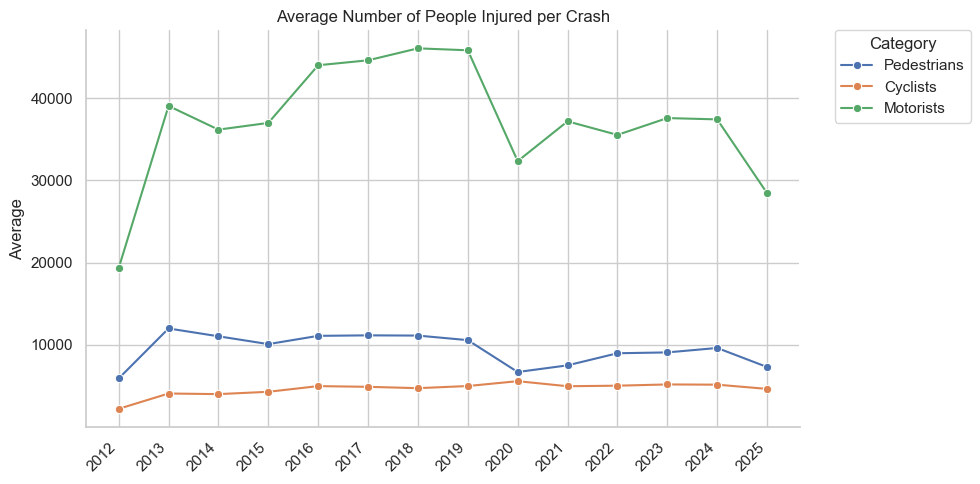

In [9]:
plot_long = plot8.melt(
    id_vars='crash_year',
    value_vars=[
        'NUMBER OF PEDESTRIANS INJURED',
        'NUMBER OF CYCLIST INJURED',
        'NUMBER OF MOTORIST INJURED'
    ],
    var_name='Category',
    value_name='Average'
)

short_map = {
    'NUMBER OF PEDESTRIANS INJURED': 'Pedestrians',
    'NUMBER OF CYCLIST INJURED': 'Cyclists',
    'NUMBER OF MOTORIST INJURED': 'Motorists'
}
plot_long['Category'] = plot_long['Category'].replace(short_map)

sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,5))

ax = sns.lineplot(
    data=plot_long,
    x='crash_year',
    y='Average',
    hue='Category',       
    marker='o',
    dashes=False
)

plt.xlabel('')
plt.ylabel('Average')
plt.title('Average Number of People Injured per Crash')

ax.set_xticks(plot_long['crash_year'].unique())
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

sns.despine()
plt.tight_layout()
plt.show()


- Which borough has the highest fatality rate?

In [10]:
plot9=df.groupby('BOROUGH')['NUMBER OF PERSONS KILLED'].size().sort_values(ascending=True).reset_index(name='count')
plot9

,BOROUGH,count
0,STATEN ISLAND,64414
1,BRONX,227837
2,MANHATTAN,340992
3,QUEENS,412248
4,BROOKLYN,493043


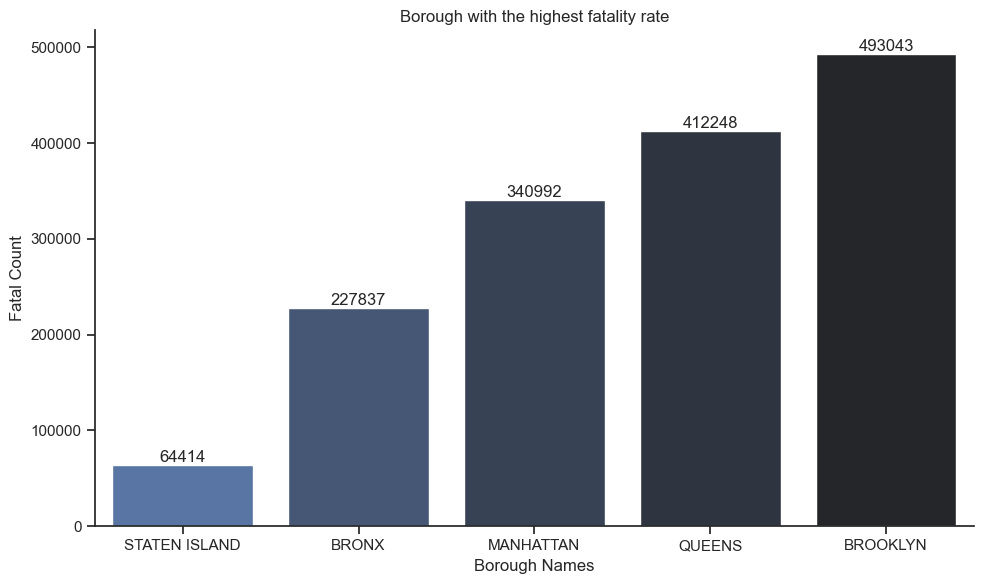

In [11]:
plt.figure(figsize=(10,6))
sns.set_theme(style='ticks')

ax=sns.barplot(data=plot9,x='BOROUGH',y='count',hue='count',palette='dark:b_r')

ax.legend_.remove()

for container in ax.containers:
    ax.bar_label(container)

plt.title('Borough with the highest fatality rate')
plt.xlabel('Borough Names')
plt.ylabel('Fatal Count')
sns.despine()
plt.tight_layout()
plt.show()